torch.Size([12, 3, 64, 64])
torch.Size([12, 40])


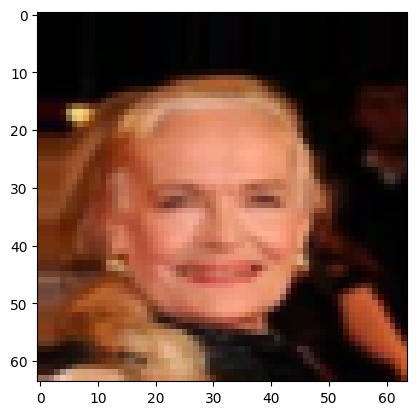

In [11]:
# import torch
# from config_loader import load_config, get_model_name
# from datasets import load_dataset
# from plotting import plot_conditioned_examples

# config = load_config("VAE_16")
# # Load dataset
# train_loader, val_loader, test_loader, image_shape = load_dataset(config["data_params"])

# model_name = get_model_name(config)
# plot_conditioned_examples(next(iter(train_loader))[0][0])

import torch
from torchvision import transforms
from datasets import CelebA

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])


dataset = CelebA('data', split='train', transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset, batch_size=12, shuffle=True)

images, labels = next(iter(dataset_loader))

print(images.shape)
print(labels.shape)

import matplotlib.pyplot as plt

plt.imshow(images[0].permute(1, 2, 0))


In [ ]:
from lightning_extensions import ExtendedTrainer
from modules import VAEModule

model = VAEModule(config['model_params'], image_shape=image_shape, model_name=config['model_name'])

trainer = ExtendedTrainer(project_name="MTVAEs", **config['trainer_params'], model_name=model_name)
trainer.fit(model, train_loader, val_loader)
#save
trainer.save_model_checkpoint()

torch.Size([1, 28, 28])


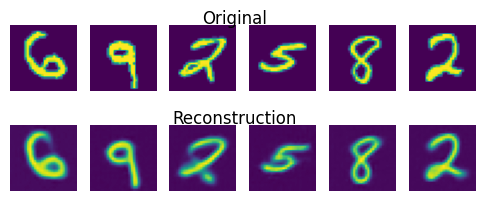

Plot latent: Model is None or latent dim is not 2 or model has no decoder


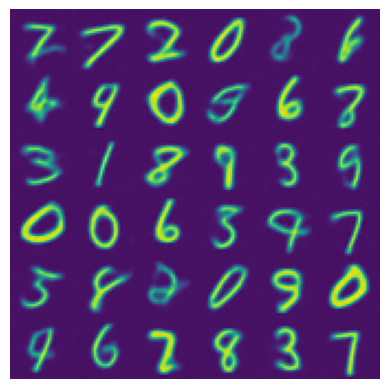

In [5]:
from modules import VAEModule
model = VAEModule.load_model_checkpoint(model_name = model_name)
model.eval()
from plotting import plot_stage_one_results
# plot some samples and their reconstruction

plot_stage_one_results(model, test_loader, save_name=model_name)